In [8]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
from graphviz import Digraph
from IPython.display import display, Image

In [9]:
# Updated synthetic dataset with 8 samples
data = pd.DataFrame({
    "Weather Condition": ["Rainy", "Sunny", "Rainy", "Sunny", "Rainy", "Sunny", "Rainy", "Sunny"],
    "Item Urgency": ["Urgent", "Not Urgent", "Not Urgent", "Urgent", "Urgent", "Urgent", "Urgent", "Not Urgent"],
    "Decision": ["Online", "In-Store", "In-Store", "In-Store", "Online", "In-Store", "Online", "In-Store"]
})
display(data)


,Weather Condition,Item Urgency,Decision
0,Rainy,Urgent,Online
1,Sunny,Not Urgent,In-Store
2,Rainy,Not Urgent,In-Store
3,Sunny,Urgent,In-Store
4,Rainy,Urgent,Online
5,Sunny,Urgent,In-Store
6,Rainy,Urgent,Online
7,Sunny,Not Urgent,In-Store


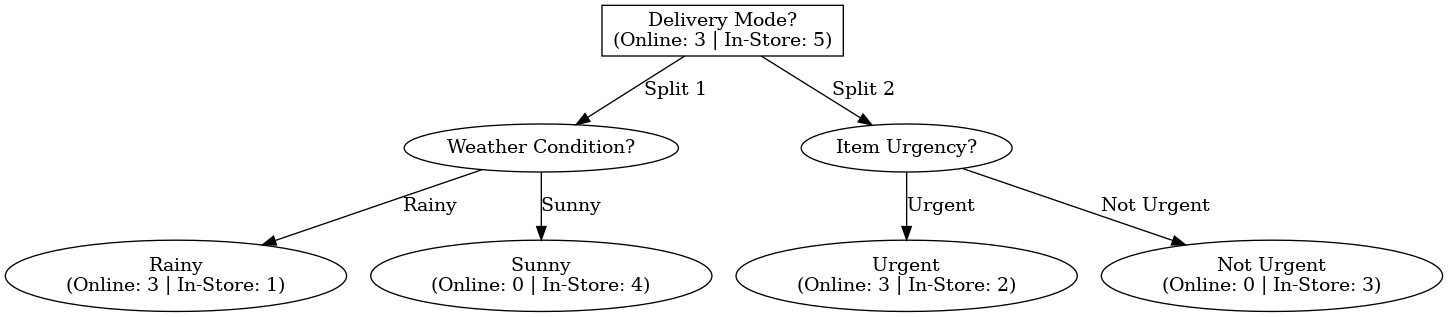

In [10]:
# Count of classes: Online = 3, In-Store = 5
dag = Digraph(comment="Delivery Mode Decision Tree", format="png")

dag.node("A", "Delivery Mode?\n(Online: 3 | In-Store: 5)", shape="box")

dag.node("B1", "Weather Condition?")
dag.edge("A", "B1", label="Split 1")

dag.node("C1", "Rainy\n(Online: 3 | In-Store: 1)")
dag.node("C2", "Sunny\n(Online: 0 | In-Store: 4)")
dag.edge("B1", "C1", label="Rainy")
dag.edge("B1", "C2", label="Sunny")

dag.node("B2", "Item Urgency?")
dag.edge("A", "B2", label="Split 2")

dag.node("D1", "Urgent\n(Online: 3 | In-Store: 2)")
dag.node("D2", "Not Urgent\n(Online: 0 | In-Store: 3)")
dag.edge("B2", "D1", label="Urgent")
dag.edge("B2", "D2", label="Not Urgent")

dag_path = dag.render('./Data/delivery_decision_tree_raw_v2.png', cleanup=True)
display(Image(dag_path))


In [11]:
# Entropy calculation
def compute_entropy(class_counts):
    probs = np.array(class_counts) / sum(class_counts)
    return entropy(probs, base=2)

# Parent Entropy
E_parent = compute_entropy([3, 5])
print("Parent Entropy:", E_parent)

# Case 1: Weather Condition
E_rainy = compute_entropy([3, 1])  # 3 Online, 1 In-Store
E_sunny = compute_entropy([0, 4])  # 0 Online, 4 In-Store
IG_weather = E_parent - ((4/8) * E_rainy + (4/8) * E_sunny)

# Case 2: Item Urgency
E_urgent = compute_entropy([3, 2])
E_not_urgent = compute_entropy([0, 3])
IG_urgency = E_parent - ((5/8) * E_urgent + (3/8) * E_not_urgent)

# Print results
print("\nEntropy Values:")
print(f"Parent Entropy: {E_parent:.3f}")
print(f"Weather - Rainy: {E_rainy:.3f}, Sunny: {E_sunny:.3f}")
print(f"Urgency - Urgent: {E_urgent:.3f}, Not Urgent: {E_not_urgent:.3f}")

print("\nInformation Gain:")
print(f"IG for Weather Condition: {IG_weather:.3f}")
print(f"IG for Item Urgency: {IG_urgency:.3f}")



Parent Entropy: 0.954434002924965

Entropy Values:
Parent Entropy: 0.954
Weather - Rainy: 0.811, Sunny: 0.000
Urgency - Urgent: 0.971, Not Urgent: 0.000

Information Gain:
IG for Weather Condition: 0.549
IG for Item Urgency: 0.348


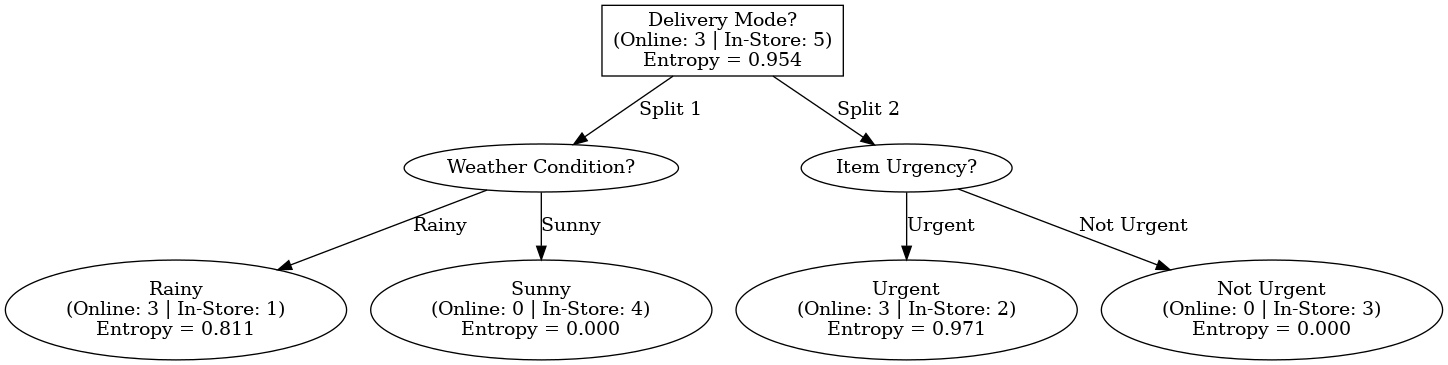

In [12]:
# Final Visualization with Entropy
dag = Digraph(comment="Delivery Mode Decision Tree", format="png")

dag.node("A", f"Delivery Mode?\n(Online: 3 | In-Store: 5)\nEntropy = {E_parent:.3f}", shape="box")

dag.node("B1", "Weather Condition?")
dag.edge("A", "B1", label="Split 1")

dag.node("C1", f"Rainy\n(Online: 3 | In-Store: 1)\nEntropy = {E_rainy:.3f}")
dag.node("C2", f"Sunny\n(Online: 0 | In-Store: 4)\nEntropy = {E_sunny:.3f}")
dag.edge("B1", "C1", label="Rainy")
dag.edge("B1", "C2", label="Sunny")

dag.node("B2", "Item Urgency?")
dag.edge("A", "B2", label="Split 2")

dag.node("D1", f"Urgent\n(Online: 3 | In-Store: 2)\nEntropy = {E_urgent:.3f}")
dag.node("D2", f"Not Urgent\n(Online: 0 | In-Store: 3)\nEntropy = {E_not_urgent:.3f}")
dag.edge("B2", "D1", label="Urgent")
dag.edge("B2", "D2", label="Not Urgent")

dag_path = dag.render('./Data/delivery_decision_tree_entropy_v2.png', cleanup=True)
display(Image(dag_path))